In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as misno
import re
import string


# Import NLTK(Natural Language Toolkit) for text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s-hir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s-hir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:

from imblearn.over_sampling import SMOTE
import imblearn
print(imblearn.__version__)

0.11.0


In [125]:
data = pd.read_csv("Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [126]:
# Define a function for text preprocessing
def preprocess_text(text):

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join tokens back into a string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply text preprocessing to the columns
data.Chief_complain = data.Chief_complain.apply(preprocess_text)
# data['Diagnosis in ED'] = data['Diagnosis in ED'].apply(preprocess_text)

# Display the cleaned DataFrame
print(data.Chief_complain)








0        right ocular pain
1       right forearm burn
2              arm pain lt
3          ascites tapping
4           distension abd
               ...        
1262         mental change
1263               dysuria
1264             dizziness
1265     sensory decreased
1266             orthopnea
Name: Chief_complain, Length: 1267, dtype: object


In [127]:
data = pd.read_csv("Dataset.csv")

# 'Chief_complain', 'Diagnosis in ED',

columns_to_drop = ['Chief_complain', 'Diagnosis in ED','Error_group', 'KTAS duration_min', 'mistriage','Group','Patients number per hour','Length of stay_min']

data.drop(columns=columns_to_drop, inplace=True)
data = data.rename(columns={'Disposition':'hospitalized','Arrival mode':'arrivalmode'})
data.columns = [col.lower() for col in data.columns]
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,rr,bt,saturation,ktas_rn,hospitalized,ktas_expert
0,2,71,3,2,1,1,2,160,100,84,18,36.6,100,2,1,4
1,1,56,3,2,1,1,2,137,75,60,20,36.5,NaN,4,1,5
2,1,68,2,2,1,1,2,130,80,102,20,36.6,98,4,2,5
3,2,71,1,1,1,1,3,139,94,88,20,36.5,NaN,4,1,5
4,2,58,3,1,1,1,3,91,67,93,18,36.5,NaN,4,1,5


In [128]:
# for column in data.columns:
#     # Check if the column is non-numeric (categorical or discrete)
#     if data[column].dtype == "object" or data[column].dtype == "int64":
#         # Count the occurrences of each unique value in the column
#         value_counts = data[column].value_counts()

#         # Create a bar plot
#         plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
#         sns.barplot(x=value_counts.index, y=value_counts.values)
#         plt.title(f'Bar Plot for {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

#         # Show the plot
#         plt.show()

In [129]:
# # Create a pairplot
# sns.set(style="ticks")
# sns.pairplot(data, diag_kind="kde", hue="hospitalized")

# # Show the plot
# plt.show()

In [130]:
# Define a list of columns to clean and convert


columns_to_clean = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']

# Loop through the columns and apply cleaning and conversion
for column in columns_to_clean:
    data[column] = data[column].replace({'#BOŞ!': np.NaN, '??': np.NaN}).astype(float)

# Verify the DataFrame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1267 non-null   int64  
 1   age           1267 non-null   int64  
 2   arrivalmode   1267 non-null   int64  
 3   injury        1267 non-null   int64  
 4   mental        1267 non-null   int64  
 5   pain          1267 non-null   int64  
 6   nrs_pain      711 non-null    float64
 7   sbp           1242 non-null   float64
 8   dbp           1238 non-null   float64
 9   hr            1247 non-null   float64
 10  rr            1245 non-null   float64
 11  bt            1249 non-null   float64
 12  saturation    570 non-null    float64
 13  ktas_rn       1267 non-null   int64  
 14  hospitalized  1267 non-null   int64  
 15  ktas_expert   1267 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 158.5 KB


            n_miss  ratio
saturation     697  55.01
nrs_pain       556  43.88
dbp             29   2.29
sbp             25   1.97
rr              22   1.74
hr              20   1.58
bt              18   1.42


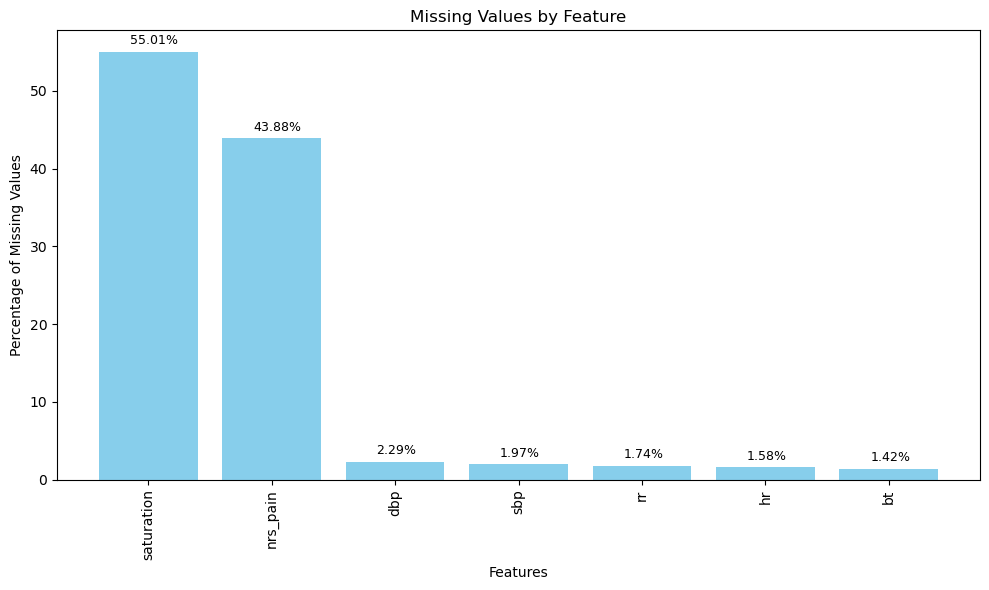

In [131]:
def missingValues(data):
    variables_NA = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[variables_NA].isnull().sum().sort_values(ascending=False)
    ratio = (data[variables_NA].isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)
    missing_data = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return missing_data

missing_data = missingValues(data)
print(missing_data)
    
# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_data.index, missing_data['ratio'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Feature')
plt.xticks(rotation=90)

# Annotate the bars with 'n_miss' and 'ratio' values
for bar, n_miss, ratio in zip(bars, missing_data['n_miss'], missing_data['ratio']):
        plt.text(bar.get_x() + bar.get_width() / 2-0.15, bar.get_height() + 1, f'{ratio}%', fontsize=9, color='black')

plt.tight_layout()
plt.show()

<Axes: >

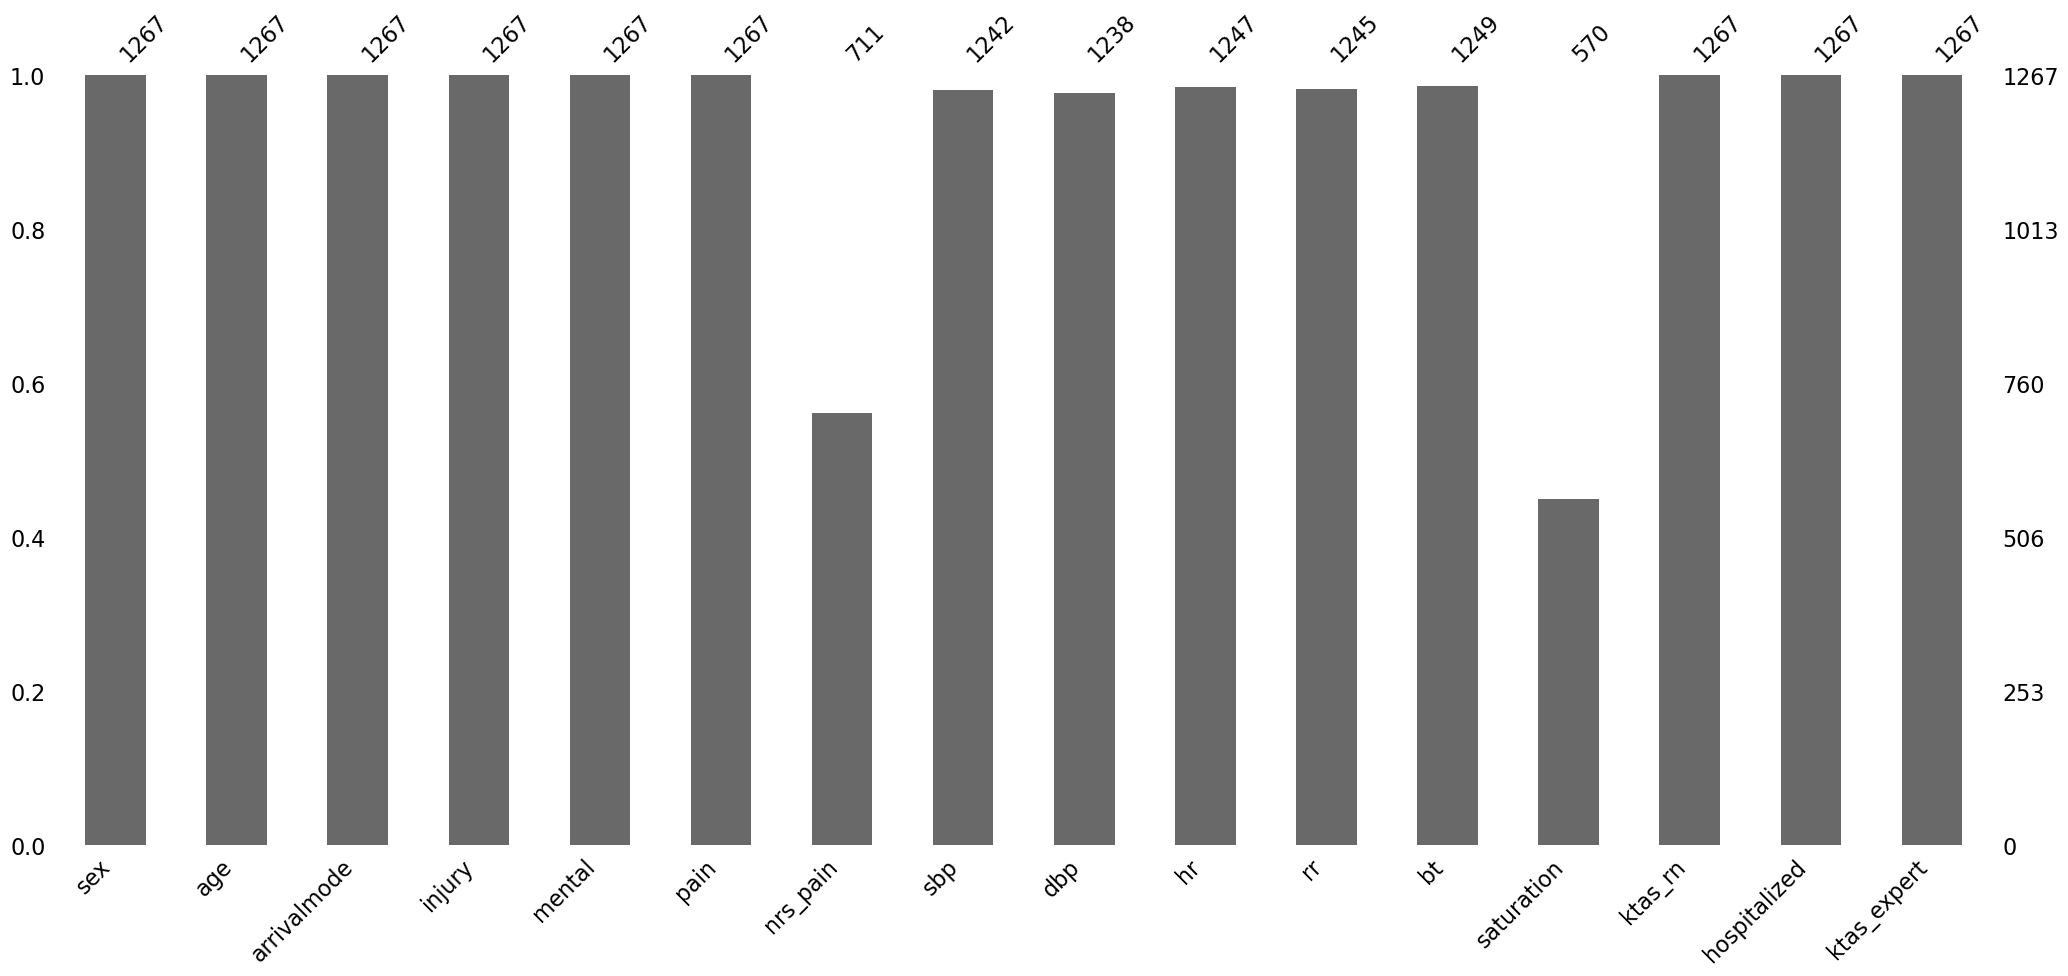

In [132]:
# !pip install missingno

misno.bar(data)


# # Define custom colors for missing and non-missing values
# missing_color = (0.8, 0.2, 0.2)  # Red color for missing values
# existing_color = (0.2, 0.4, 0.8)  # Blue color for non-missing values

# # Create a colorful missing values bar plot
# misno.bar(data, color=(existing_color, missing_color))

# # Set custom labels for the plot
# plt.xlabel("Features", fontsize=14)
# plt.ylabel("Percentage of Missing Values", fontsize=14)
# plt.title("Missing Values Matrix", fontsize=16)

# # Show the plot
# plt.show()

In [133]:
data.isnull().values.any()

True

<Axes: >

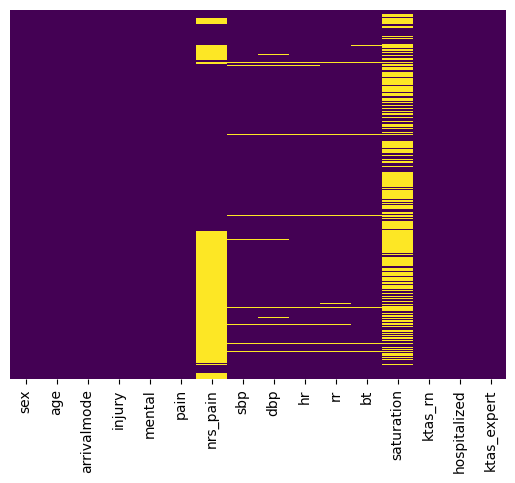

In [134]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

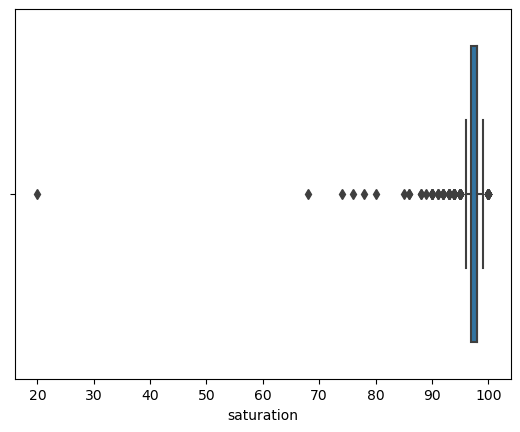

In [135]:
sns.boxplot(x=data['saturation'])
plt.show()

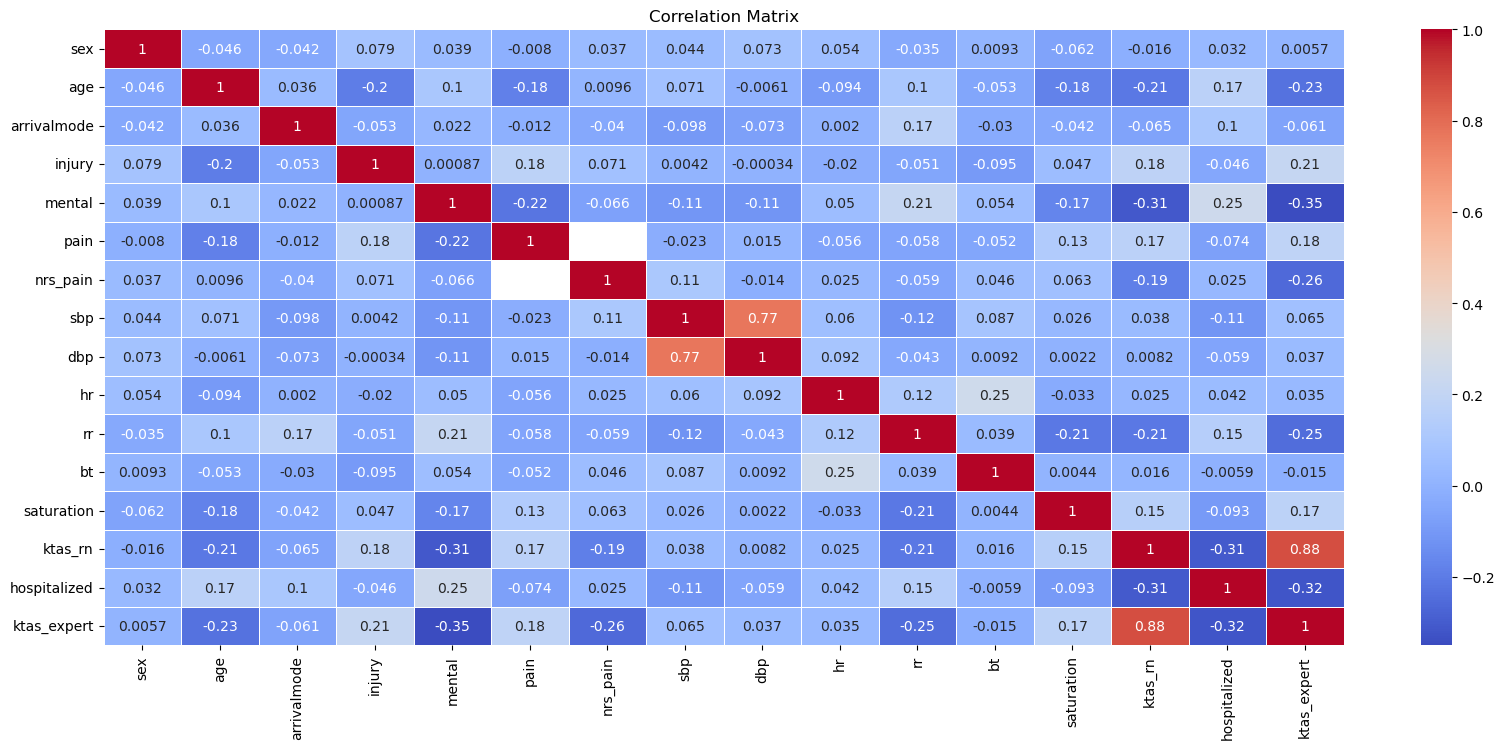

In [136]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [137]:
def impute_nan(df,variable):    
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [138]:
data_imputation =["nrs_pain","rr","hr","sbp","dbp","bt"]

for i in data_imputation:
    impute_nan(data,i)

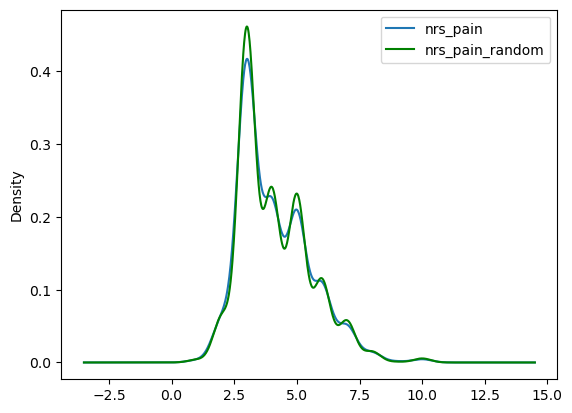

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['nrs_pain'].plot(kind='kde', ax=ax)
# data.nrs_pain_median.plot(kind='kde', ax=ax, color='red')
data.nrs_pain_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

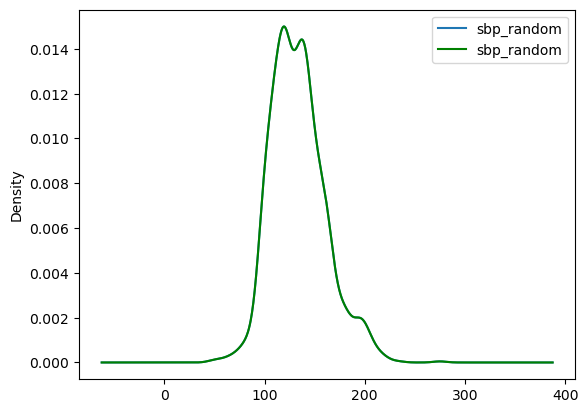

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['sbp_random'].plot(kind='kde', ax=ax)
# data.nrs_pain_median.plot(kind='kde', ax=ax, color='red')
data.sbp_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [141]:
data["saturation"] = data.groupby([ "ktas_expert"])["saturation"].transform(lambda x: x.fillna(x.mode()[0]))
data.isnull().values.any()

True

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              1267 non-null   int64  
 1   age              1267 non-null   int64  
 2   arrivalmode      1267 non-null   int64  
 3   injury           1267 non-null   int64  
 4   mental           1267 non-null   int64  
 5   pain             1267 non-null   int64  
 6   nrs_pain         711 non-null    float64
 7   sbp              1242 non-null   float64
 8   dbp              1238 non-null   float64
 9   hr               1247 non-null   float64
 10  rr               1245 non-null   float64
 11  bt               1249 non-null   float64
 12  saturation       1267 non-null   float64
 13  ktas_rn          1267 non-null   int64  
 14  hospitalized     1267 non-null   int64  
 15  ktas_expert      1267 non-null   int64  
 16  nrs_pain_random  1267 non-null   float64
 17  rr_random     

In [143]:
data['hospitalized'] = data['hospitalized'].replace({1:0, 2:1, 3:1, 4:0,5:1,6:0,7:1})

data['sex'] = data['sex'].replace({1:0,2:1})
data['injury'] = data['injury'].replace({1:0,2:1})
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,...,saturation,ktas_rn,hospitalized,ktas_expert,nrs_pain_random,rr_random,hr_random,sbp_random,dbp_random,bt_random
0,1,71,3,1,1,1,2.0,160.0,100.0,84.0,...,100.0,2,0,4,2.0,18.0,84.0,160.0,100.0,36.6
1,0,56,3,1,1,1,2.0,137.0,75.0,60.0,...,98.0,4,0,5,2.0,20.0,60.0,137.0,75.0,36.5
2,0,68,2,1,1,1,2.0,130.0,80.0,102.0,...,98.0,4,1,5,2.0,20.0,102.0,130.0,80.0,36.6
3,1,71,1,0,1,1,3.0,139.0,94.0,88.0,...,98.0,4,0,5,3.0,20.0,88.0,139.0,94.0,36.5
4,1,58,3,0,1,1,3.0,91.0,67.0,93.0,...,98.0,4,0,5,3.0,18.0,93.0,91.0,67.0,36.5


In [144]:
# for column in data.columns:
#     # Check if the column is non-numeric (categorical or discrete)
#     if data[column].dtype == "object" or data[column].dtype == "int64":
#         # Count the occurrences of each unique value in the column
#         value_counts = data[column].value_counts()

#         # Create a bar plot
#         plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
#         sns.barplot(x=value_counts.index, y=value_counts.values)
#         plt.title(f'Bar Plot for {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

#         # Show the plot
#         plt.show()

In [145]:
# strings = [x for x in data['sbp'] if type(x) is str]
# len(strings)

In [146]:

data = data[[col for col in data.columns if col != 'hospitalized'] + ['hospitalized']]


In [147]:
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,...,saturation,ktas_rn,ktas_expert,nrs_pain_random,rr_random,hr_random,sbp_random,dbp_random,bt_random,hospitalized
0,1,71,3,1,1,1,2.0,160.0,100.0,84.0,...,100.0,2,4,2.0,18.0,84.0,160.0,100.0,36.6,0
1,0,56,3,1,1,1,2.0,137.0,75.0,60.0,...,98.0,4,5,2.0,20.0,60.0,137.0,75.0,36.5,0
2,0,68,2,1,1,1,2.0,130.0,80.0,102.0,...,98.0,4,5,2.0,20.0,102.0,130.0,80.0,36.6,1
3,1,71,1,0,1,1,3.0,139.0,94.0,88.0,...,98.0,4,5,3.0,20.0,88.0,139.0,94.0,36.5,0
4,1,58,3,0,1,1,3.0,91.0,67.0,93.0,...,98.0,4,5,3.0,18.0,93.0,91.0,67.0,36.5,0


<Axes: >

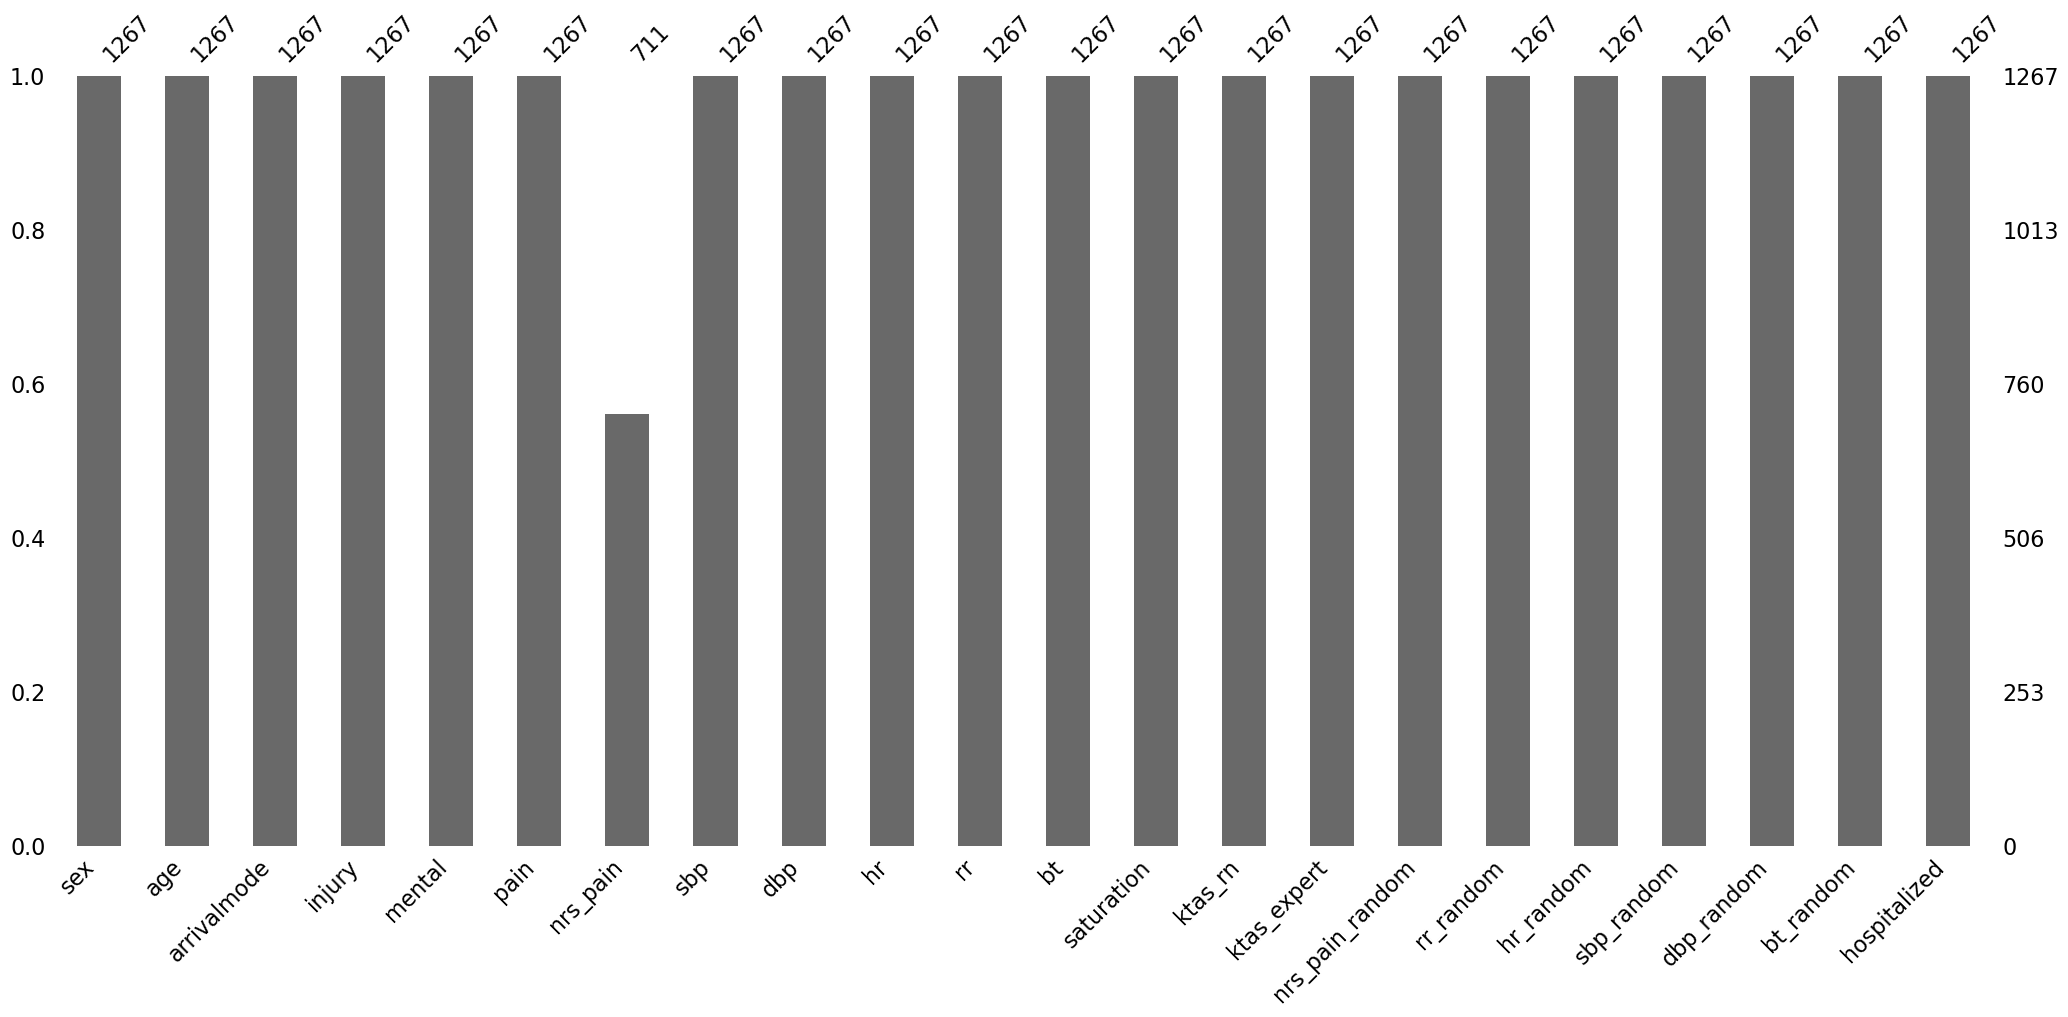

In [148]:
# data['nrs_pain'] = data['nrs_pain'].fillna(data['nrs_pain'].median())
data['sbp'] = data['sbp'].fillna(data['sbp'].median())

data['dbp'] = data['dbp'].fillna(data['dbp'].median())
data['hr'] = data['hr'].fillna(data['hr'].median())
data['rr'] = data['rr'].fillna(data['rr'].median())

data['bt'] = data['bt'].fillna(data['bt'].median())
data['saturation'] = data['saturation'].fillna(data['saturation'].median())
misno.bar(data)

In [149]:
data.drop(columns=data_imputation, inplace=True)

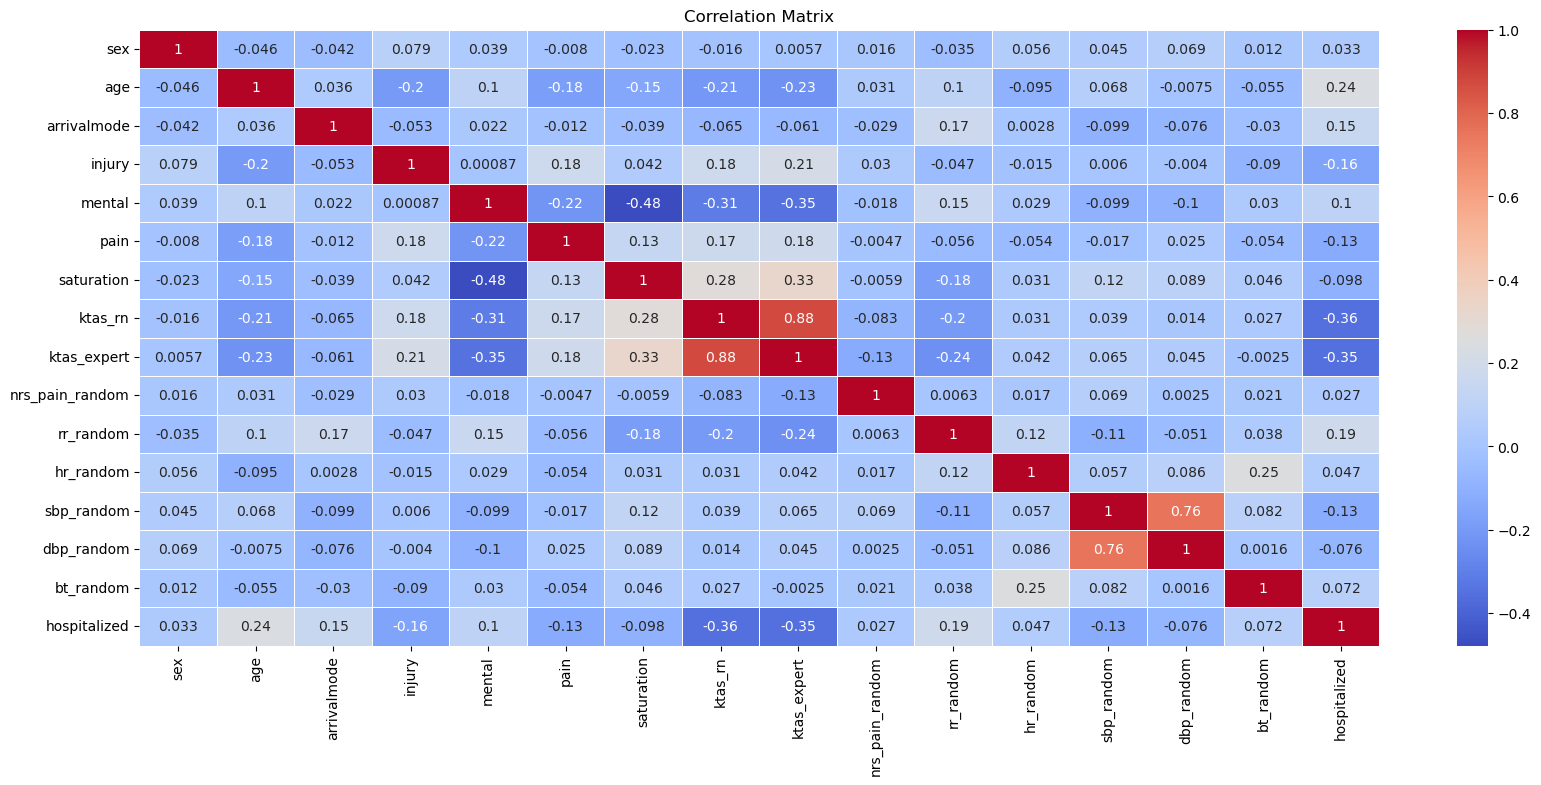

In [150]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [151]:
count = data['hospitalized'].value_counts()
print(count)

hospitalized
0    832
1    435
Name: count, dtype: int64


In [152]:
print(data['hospitalized'])

0       0
1       0
2       1
3       0
4       0
       ..
1262    1
1263    0
1264    0
1265    1
1266    1
Name: hospitalized, Length: 1267, dtype: int64


In [153]:
# !pip install -U imbalanced-learn
# !pip install -U scikit-learn
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

In [154]:
X = data.drop('hospitalized', axis=1)
y = data[['hospitalized']]


smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 72)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 62)



# NB = GaussianNB().fit(X_train, y_train)


# svm = SVC(random_state=357,gamma='auto').fit(X_train, y_train)






C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Your code for reading the dataset remains the same.
data = pd.read_csv("Dataset.csv")


columns_to_drop = ['Chief_complain', 'Diagnosis in ED','Error_group', 'KTAS duration_min', 'mistriage','Group','Patients number per hour','Length of stay_min']

data.drop(columns=columns_to_drop, inplace=True)
data = data.rename(columns={'Disposition':'hospitalized','Arrival mode':'arrivalmode'})
data.columns = [col.lower() for col in data.columns]
data.head()
columns_to_clean = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']

# Loop through the columns and apply cleaning and conversion
for column in columns_to_clean:
    data[column] = data[column].replace({'#BOŞ!': np.NaN, '??': np.NaN}).astype(float)

# Perform one-hot encoding for categorical features
categorical_features = ['arrivalmode', 'sex', 'injury', 'ktas_expert']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Feature scaling for numerical features
numerical_features = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Feature selection using chi-squared test
X = data.drop('hospitalized', axis=1)
y = data['hospitalized']
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
data = pd.concat([data['hospitalized'], data[selected_features]], axis=1)

# Split the dataset into training and testing sets
X_resampled, y_resampled = smote.fit_resample(data.drop('hospitalized', axis=1), data['hospitalized'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=72)

# Hyperparameter tuning for SVM (as shown in the previous response)

# Model training and evaluation (as shown in the previous response)


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=357)
svm_grid = GridSearchCV(svm, param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Get the best SVM model from the grid search
best_svm = svm_grid.best_estimator_

# Train the best SVM model
best_svm.fit(X_train, y_train)

# Make predictions
svm_predictions = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy: 77.48%


C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:

X_resampled.info()
y_resampled.info()


count = y_resampled['hospitalized'].value_counts()
print(count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              1664 non-null   int64  
 1   age              1664 non-null   int64  
 2   arrivalmode      1664 non-null   int64  
 3   injury           1664 non-null   int64  
 4   mental           1664 non-null   int64  
 5   pain             1664 non-null   int64  
 6   saturation       1664 non-null   float64
 7   ktas_rn          1664 non-null   int64  
 8   ktas_expert      1664 non-null   int64  
 9   nrs_pain_random  1664 non-null   float64
 10  rr_random        1664 non-null   float64
 11  hr_random        1664 non-null   float64
 12  sbp_random       1664 non-null   float64
 13  dbp_random       1664 non-null   float64
 14  bt_random        1664 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 195.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entr

In [156]:
# NB = GaussianNB().fit(X_resampled, y_resampled)


# svm = SVC(random_state=357,gamma='auto').fit(X_resampled, y_resampled)

In [157]:
from sklearn.metrics import accuracy_score
models = [
          ("NB", NB),
          ("SVM", svm),
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

NB: (0.750751)
SVM: (0.756757)


In [158]:
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_NB = NB.predict(X_test)
y_pred_SVM = svm.predict(X_test)

# Calculate the accuracy of each model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# Multiply the accuracy by 100 to get the percentage accuracy
percentage_accuracy_NB = accuracy_NB * 100
percentage_accuracy_SVM = accuracy_SVM * 100

# Print the percentage accuracy of each model
print("Percentage accuracy of NB:", percentage_accuracy_NB)
print("Percentage accuracy of SVC:", percentage_accuracy_SVM)


Percentage accuracy of NB: 75.07507507507508
Percentage accuracy of SVC: 75.67567567567568
